# Flight Price Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## Importing necessary libraries

# For working with Dataframes 
import pandas as pd

# For scientific computation
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model Refining libraries
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

from sklearn.feature_selection import SelectFromModel

# Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

## Data Acquisition

Since data is in form of excel file we have to use pandas read_excel to load the data

In [20]:
train_data = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Flight Prediction/Data_Train (1).xlsx')
pd.set_option('display.max_columns', None)

## First 5 entries of dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Exploring dataset

In [21]:
print('The shape of the Dataset is:',train_data.shape)

The shape of the Dataset is: (10683, 11)


In [22]:
train_data.size

117513

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can see that all the feature are  **object** datatype, so we need to change all the datatype into numerical features

In [24]:
## Number of columns
len(train_data.columns)

11

In [25]:
## Describe all columns
train_data.describe(include = "all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


## Data Wrangling

In [26]:
## Checking nan values
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are 2 missing values in the dataset, so we can drop the value

In [27]:
## Dropping the Nan value
train_data.dropna(inplace = True)

In [28]:
train_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

The dataset has **no NAN** values

## Feature Engineering

In [29]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


From description we can see that **Date_of_Journey** is a **object data type**. Therefore, we have to convert this datatype into **Timestamp** to gather insight


In [30]:
## To make a new feature for Journery Day
train_data['Journey_Day']=pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.day

## To make a new feature for Journery month
train_data['Journey_Month']=pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

## Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

train_data.head()



,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


Similar to Date_of_Journey we can extract values from Dep_Time using **Timestamp**

In [31]:
## making a new feature to cature departure hour
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour

## making a new feature to cature departure minutes
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute

##Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


Arrival time is when the plane pulls up to the gate. Similar to Date_of_Journey we can extract values from Arrival_Time using Time stamp

In [32]:
#extracting arrival hour
train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour

#extracting arrival min
train_data['Arrival_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


Time taken by plane to reach destination is called Duration. It is the differnce betwwen Departure Time and Arrival time. Making seperate feature to capture it.

In [33]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [34]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

#Dropping the duration column
train_data.drop(["Duration"], axis = 1, inplace = True)

train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


([<matplotlib.patches.Wedge at 0x7f6a6e83b650>,
 [Text(0.7654831573007651, 0.7899591988760257, 'March'),
  Text(-0.3759519421749271, 1.0337601932628768, 'April'),
  Text(-1.0928091102809305, -0.12557168664552137, 'May'),
  Text(0.5905670847586901, -0.9280250634544427, 'June')],
 [Text(0.4175362676185991, 0.4308868357505594, '25.5%'),
  Text(-0.2050646957317784, 0.5638691963252055, '10.1%'),
  Text(-0.5960776965168711, -0.06849364726119347, '32.4%'),
  Text(0.32212750077746727, -0.5061954891569687, '32.0%')])

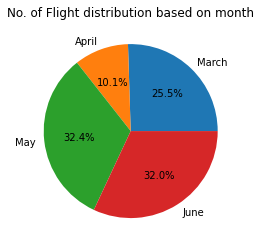

In [ ]:
# Plotting the flight distribution per month
plt.title('No. of Flight distribution based on month')
labels = 'March', 'April', 'May', 'June'
sizes=train_data.groupby('Journey_Month').size()
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=False)

We can see that the data we have is of 4 months. May has the highest number of flights booked.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Flights')

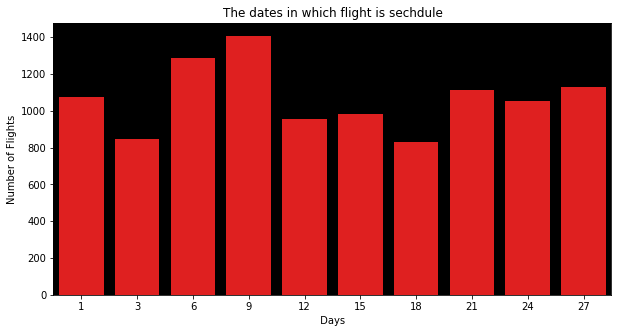

In [35]:
train_data['Journey_Day']
plt.figure(figsize=(10,5))

ax = plt.axes()
ax.set(facecolor = 'black')
travel_date=train_data['Journey_Day'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(travel_date['index'],travel_date['Journey_Day'],color='Red',)
plt.title('The dates in which flight is sechdule')
plt.xlabel(' Days ')
plt.ylabel('Number of Flights')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


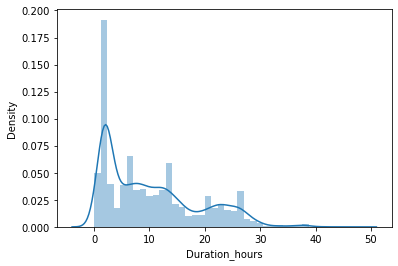

In [36]:
## The distribution of the duration of flight
sns.distplot(train_data['Duration_hours'])

### Handeling Categorical Variable

Text(0.5, 1.0, 'The count of AirLines')

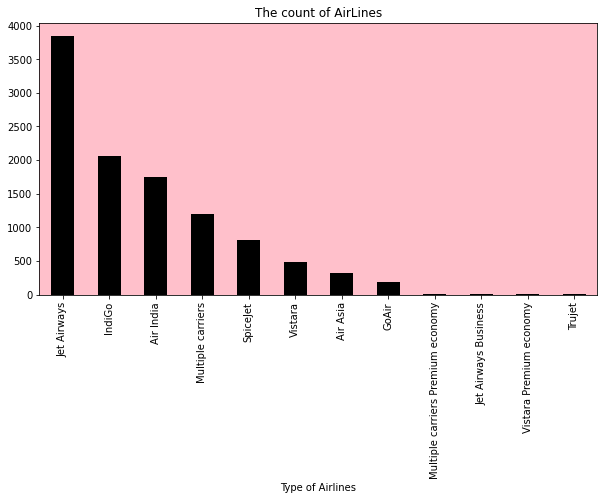

In [37]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set(facecolor = 'pink')
train_data['Airline'].value_counts().plot(kind='bar',color='black')
plt.xlabel('Type of Airlines')
plt.title('The count of AirLines')

From the graphs, we can see jetairways has the maximum no. fo flights

Text(0.5, 1.0, 'Plot to show Airline-vs-Price')

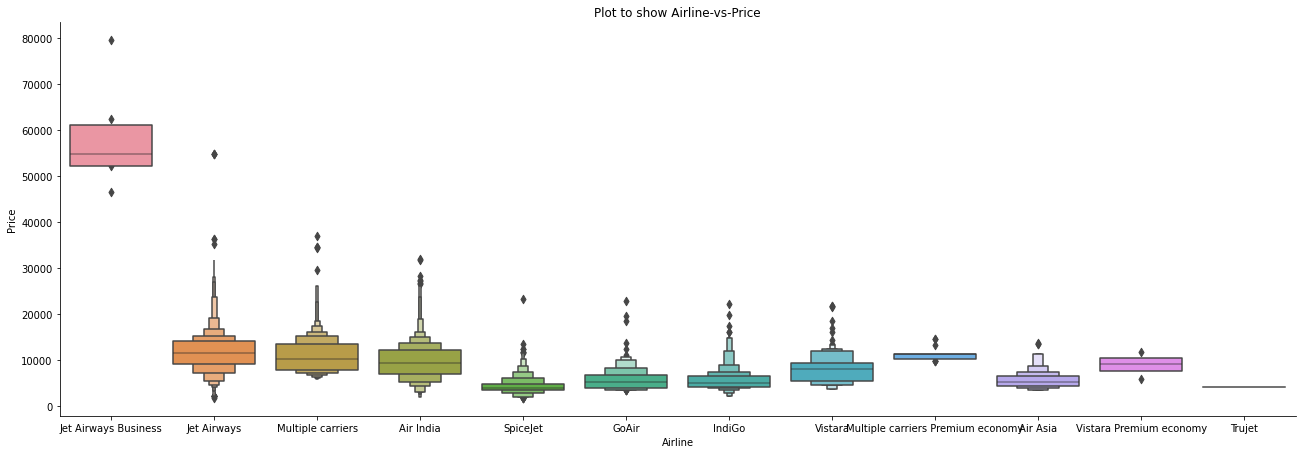

In [38]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.title('Plot to show Airline-vs-Price')

From graph we can see that Jet Airways Business have the highest Price.
Apart from the first Airline almost all are having similar median

In [39]:
#As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline=train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'The source of the flight')

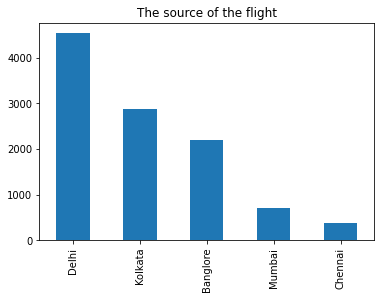

In [40]:
## Visualizing a source city
train_data['Source'].value_counts().plot(kind='bar')
plt.title('The source of the flight')

In [41]:
## One hot encoding the source city and storing the value in dataframe
source=train_data[['Source']]
source=pd.get_dummies(source, drop_first=False)
source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


Text(0.5, 1.0, 'The Destination of the flight')

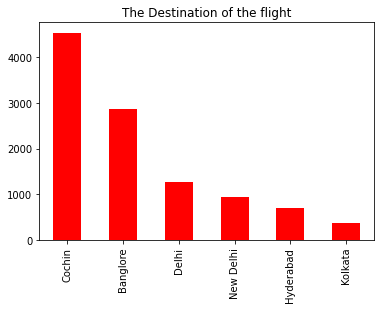

In [42]:
# Count of destination cities
train_data['Destination'].value_counts().plot(kind='bar',color='red')
plt.title('The Destination of the flight')

Delhi is the source city for most of the flights and Cochin being the desitination of the most of the flights

In [43]:
# Performing one hot encoding to the destination feature
destination=train_data[['Destination']]
destination=pd.get_dummies(destination, drop_first=False)
destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [47]:
## The route feature
print(train_data['Route'].head())

print('The length of root is',len(train_data['Route'].value_counts()))


0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
4          BLR → NAG → DEL
Name: Route, dtype: object
The length of root is 128


In [48]:
# Route and Total_Stops are related to each other so dropping route feature

train_data.drop(["Route"], axis = 1, inplace = True)

In [49]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The count of number of stops')

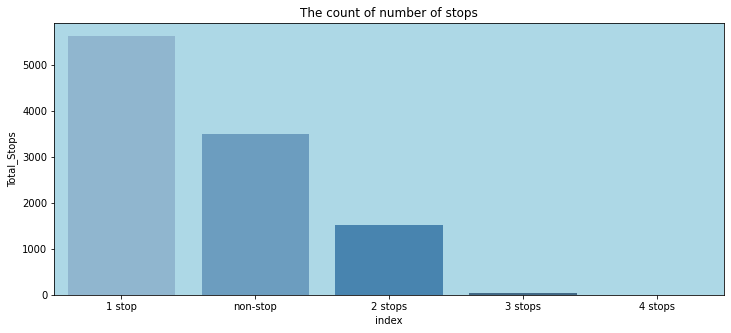

In [50]:
plt.figure(figsize=(12,5))

ax = plt.axes()
ax.set(facecolor = 'lightblue')
stops=train_data['Total_Stops'].value_counts().sort_values(ascending=False).reset_index()
sns.barplot(stops['index'],stops['Total_Stops'],palette="Blues_d",color='smoker')
plt.title('The count of number of stops')

Text(0.5, 1.0, ' Price vs Stop feature for source city')

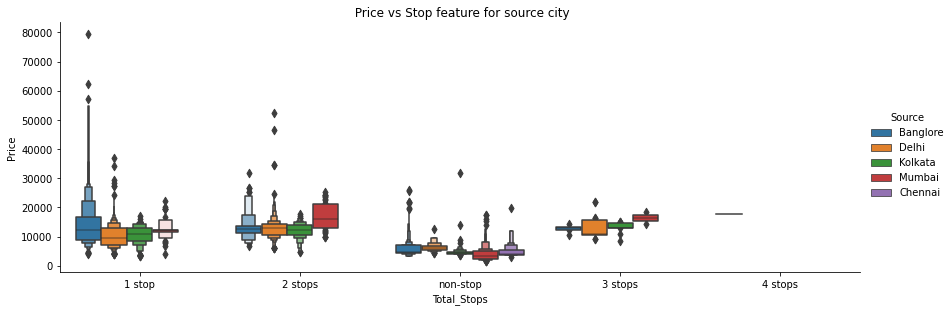

In [51]:
sns.catplot(y = "Price", x = "Total_Stops", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3,hue='Source')
plt.title(' Price vs Stop feature for source city')


In [52]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [53]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

We can see addtional information have many non info labels

In [54]:
#Additional info column contain mostly all the non info,so we can drop this feature to
train_data.drop(["Additional_Info"], axis = 1, inplace = True)

In [55]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [56]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, source, destination], axis = 1)

In [57]:
data_train

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [58]:
## Dropping old categorical features
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [59]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [60]:
data_train.shape

(10682, 32)

### Feature Scaling

In [61]:
## Making a dataframe for independent varaible for scaling
feature_scale=[feature for feature in data_train.columns if feature not in ['Price']]

## Scaling the feature using Minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
scaled.fit(data_train[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [63]:
## Transforming the scale feature into a data frame
scaled.transform(data_train[feature_scale])

array([[0.        , 0.88461538, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.30769231, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.30769231, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [64]:
# transform the train and test set, and add on the Id and SalePrice variables
scaled_data = pd.concat([data_train[['Price']].reset_index(drop=True),
                    pd.DataFrame(scaled.transform(data_train[feature_scale]), columns=feature_scale)],
                    axis=1)

In [65]:
scaled_data.head()

,Price,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,0.00,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7662,0.50,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,13882,0.50,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6218,0.25,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13302,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The features have been scaled using min max scaler

### Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

In [66]:
## Shape of dataframe
scaled_data.shape

(10682, 32)

In [67]:
## Feature details
scaled_data.columns

Index(['Price', 'Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [69]:
## Diving the independent feature and storing value in X variable
X_scaled = scaled_data.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X_scaled.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.00,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.50,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.25,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.25,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
X_scaled.shape

(10682, 29)

In [71]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

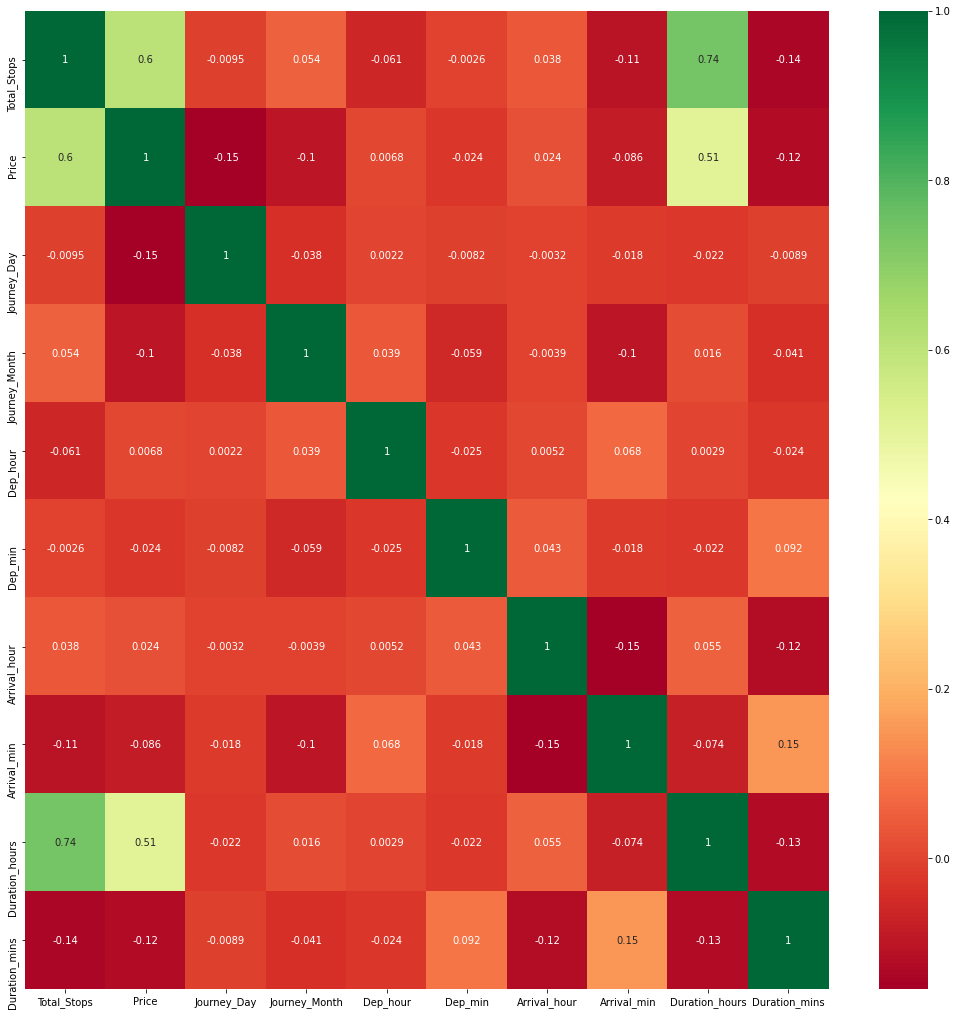

In [72]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

In [73]:
## Finding pearson correlation and P-Value for all the feature
from scipy import stats
for feature in X_scaled:
  pearson_coef, p_value = stats.pearsonr(data_train[feature], data_train['Price'])
  print("The Pearson Correlation Coefficient for {} feature is {}".format(feature,pearson_coef), " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient for Total_Stops feature is 0.6038969088067213  with a P-value of P =  0.0
The Pearson Correlation Coefficient for Journey_Day feature is -0.15377365931260262  with a P-value of P =  1.589756377445712e-57
The Pearson Correlation Coefficient for Journey_Month feature is -0.1036432627449073  with a P-value of P =  6.633144379955056e-27
The Pearson Correlation Coefficient for Dep_hour feature is 0.006799237434690597  with a P-value of P =  0.4822722441219096
The Pearson Correlation Coefficient for Dep_min feature is -0.024457812162121825  with a P-value of P =  0.011475056934970999
The Pearson Correlation Coefficient for Arrival_hour feature is 0.02424373462146743  with a P-value of P =  0.012218984087590631
The Pearson Correlation Coefficient for Arrival_min feature is -0.08615532010971903  with a P-value of P =  4.661905057421251e-19
The Pearson Correlation Coefficient for Duration_hours feature is 0.5087777592418841  with a P-value of P =  0.0
The Pea

In [74]:
## Apply Feature Selection
# first, Specifying the Lasso Regression model
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then we use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero
feature_sel_model=SelectFromModel(Lasso(alpha=0.002,random_state=0))
feature_sel_model.fit(X_scaled,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54452946.54074097, tolerance: 22714623.071221344
  positive)


SelectFromModel(estimator=Lasso(alpha=0.002, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [75]:
selected_features=X_scaled.columns[(feature_sel_model.get_support())]

# let's print some stats
print('Total features in dataset was{}'.format(X_scaled.shape[1]))
print('Selected Features are {}'.format(len(selected_features)))
print('Features whose coefficients shrank to zero: {}'.format(X_scaled.shape[1]-len(selected_features)))

Total features in dataset was29
Selected Features are 29
Features whose coefficients shrank to zero: 0


We can see all the feature are important for prediction

 Extra Trees Regressor is a type of ensemble technique which uses bootstrap replicasfor the whole original sample  as well as it also chooses randomly  the cut points in order to split nodes.

In [76]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_scaled, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

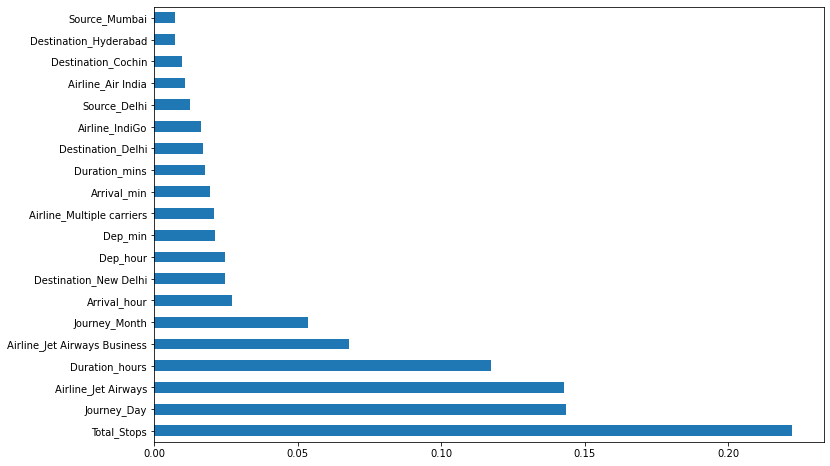

In [77]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [78]:
## Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y, test_size = 0.20, random_state=10)

### Model Building
Since the probelm is for regression, we can compare scores of diffrent models in order to find the best model.

#### Defining a function and  perform hyperparameter tuning to know the score for diffrent models

In [83]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
         'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False] 
            }
         },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto','scale']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random'],
                'max_depth':[10,20,30,40,50],
                'max_leaf_nodes':[10,20,30,40]
            }
        },
        
        'bagging regressor': {
            'model': BaggingRegressor(random_state=1),
            'parameters': {
                'n_estimators': [5,10,15,20]
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(criterion='mse'),
            'parameters': {
                'n_estimators': [5,10,15,20]
            }
        } ,
        
        
        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2,5,10,20]
            }
        }
    }
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
                   })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])
        
   

In [84]:
find_best_model(X_train, y_train)

,model,best_parameters,score
0,linear_regression,{'normalize': True},-3.382197e+07
1,lasso,"{'alpha': 1, 'selection': 'random'}",6.295354e-01
2,svr,{'gamma': 'scale'},4.231751e-02
3,decision_tree,"{'criterion': 'mse', 'max_depth': 10, 'max_lea...",7.415693e-01
4,bagging regressor,{'n_estimators': 20},8.062875e-01
5,random_forest,{'n_estimators': 20},8.006972e-01
6,knn,{'n_neighbors': 5},7.315838e-01


We can see **bagging regressor** and **random forest** have highest accuracy

In [85]:
#  Going with random forest to Build the model

model=RandomForestRegressor(n_estimators=20)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [86]:
## Models performance on train data
print('The R2 square of the train set is',model.score(X_train, y_train))

## Models performance on test data
print('The R2 square of the test set is',model.score(X_test,y_test))

The R2 square of the train set is 0.9489515910529227
The R2 square of the test set is 0.7983786357688702


In [87]:
## Giving more details for the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1211.1207258670331
Mean Squared Error: 4356988.439817965
Root Mean Squared Error: 2087.340039336659


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


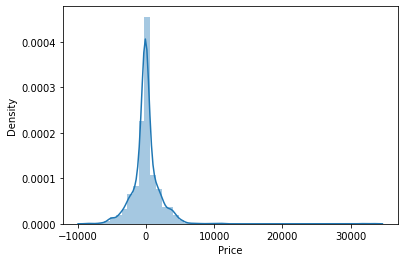

In [88]:
## The distribution of the dependent variable is normal distribution
sns.distplot(y_test-y_pred)
plt.show()

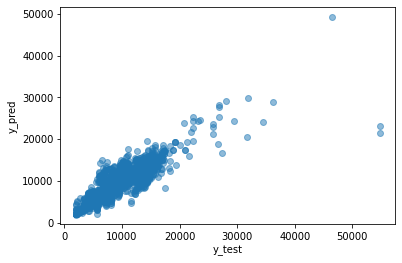

In [89]:
## Relationship between y test and y predicted
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Model Evaluation and Refinement

In [90]:
# Hyperparameter Tuning for random forest using random grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [91]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [101]:
## Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [102]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: ignored

In [94]:
## Getting the best parameter
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [95]:
## Building the model using best parameter
new_model=RandomForestRegressor(n_estimators=700,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)

## Fitting the model to the data
new_model.fit(X_train,y_train)

y_pred=new_model.predict(X_test)

In [96]:
## Models performance on train data
print('The R2 square of the train set is',new_model.score(X_train, y_train))

## Models performance on test data
print('The R2 square of the test set is',new_model.score(X_test,y_test))

The R2 square of the train set is 0.9055411088989205
The R2 square of the test set is 0.8082152152241484


In [97]:
## Using k fold cross validation in order to know the score
cv2 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

print(cross_val_score(new_model,X_scaled,y,cv=cv2))

[0.82616982 0.81908493 0.82458078 0.8278618  0.71519723]


In [ ]:
## Getting more details for the model
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1612.6089845654374
MSE: 5980156.028456309
RMSE: 2445.4357543097117


## Model Building - ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
predictor=Sequential()

# Adding the input layer and the first hidden layer
predictor.add(Dense(units = 50,activation='relu',input_dim = 29))

# Adding the second hidden layer
predictor.add(Dense(units = 100,activation='relu'))

# Adding the third hidden layer
predictor.add(Dense(units = 150,activation='relu'))

# Adding the output layer
predictor.add(Dense(1))



In [ ]:
# Compiling the ANN
predictor.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

# Fitting the ANN to the Training set
predictor.fit(X_train, y_train, epochs=50)

Epoch 1/50
234/234 [==============================] - 1s 2ms/step - loss: 84219871.9660 - mean_squared_error: 84219871.9660
Epoch 2/50
234/234 [==============================] - 1s 2ms/step - loss: 14302554.4596 - mean_squared_error: 14302554.4596
Epoch 3/50
234/234 [==============================] - 1s 2ms/step - loss: 11102123.5915 - mean_squared_error: 11102123.5915
Epoch 4/50
234/234 [==============================] - 1s 2ms/step - loss: 10158575.1894 - mean_squared_error: 10158575.1894
Epoch 5/50
234/234 [==============================] - 1s 2ms/step - loss: 9116172.1447 - mean_squared_error: 9116172.1447
Epoch 6/50
234/234 [==============================] - 1s 2ms/step - loss: 9677870.5000 - mean_squared_error: 9677870.5000
Epoch 7/50
234/234 [==============================] - 1s 2ms/step - loss: 9088772.2000 - mean_squared_error: 9088772.2000
Epoch 8/50
234/234 [==============================] - 1s 2ms/step - loss: 8720447.1660 - mean_squared_error: 8720447.1660
Epoch 9/50
234/2

In [ ]:
pred_train= predictor.predict(X_train)
## Models performance on train data
print('The R2 square of the train set is',r2_score(y_train,pred_train))

pred= predictor.predict(X_test)
## Models performance on test data
print('The R2 square of the test set is',r2_score(y_test,pred))



The R2 square of the train set is 0.7795518525490681
The R2 square of the test set is 0.7224541904677982


In [ ]:
print('The mean square error for training data is',np.sqrt(mean_squared_error(y_train,pred_train)))
print('The mean square error for training data is',np.sqrt(mean_squared_error(y_test,pred))) 

The mean square error for training data is 2161.7571500663034
The mean square error for training data is 2437.712056765718


### Model Evaluation and Refinement

In [ ]:
## Importing libraries for Hyperparamter tuning
from tensorflow.keras import layers
from keras_tuner import RandomSearch
from tensorflow import keras


def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error','r2_score'])
    return model

In [ ]:
## Random searching 
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory="/content/drive/MyDrive/Colab Notebooks/Flight Prediction/Flight Price Prediction",
    project_name="Flight Price Prediction",
)

INFO:tensorflow:Reloading Oracle from existing project /content/drive/MyDrive/Colab Notebooks/Flight Prediction/Flight Price Prediction/Flight Price Prediction/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/MyDrive/Colab Notebooks/Flight Prediction/Flight Price Prediction/Flight Price Prediction/tuner0.json


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 19
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [ ]:
## Searching the best mean absolute error
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [ ]:
models = tuner.get_best_models(num_models=2)

In [ ]:
tuner.results_summary()

Results summary
Results in /content/drive/MyDrive/Colab Notebooks/Flight Prediction/Flight Price Prediction/Flight Price Prediction
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 5
units_0: 288
units_1: 384
learning_rate: 0.001
units_2: 416
units_3: 320
units_4: 32
units_5: 352
units_6: 32
units_7: 480
units_8: 256
units_9: 96
units_10: 192
units_11: 96
units_12: 448
units_13: 480
units_14: 480
units_15: 128
units_16: 320
Score: 1825.23681640625
Trial summary
Hyperparameters:
num_layers: 17
units_0: 224
units_1: 160
learning_rate: 0.0001
units_2: 416
units_3: 96
units_4: 480
units_5: 448
units_6: 480
units_7: 160
units_8: 320
units_9: 384
units_10: 416
units_11: 352
units_12: 480
units_13: 416
units_14: 352
units_15: 128
units_16: 384
Score: 1894.646484375
Trial summary
Hyperparameters:
num_layers: 15
units_0: 448
units_1: 416
learning_rate: 0.0001
units_2: 288
units_3: 96
units_4: 480
units_5: 320
units_6: 1